In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
print('Setup complete!')

Setup complete!


In [2]:
warnings.filterwarnings('ignore')

## The data

In [3]:
# Loading the data
bmi = pd.read_csv('BMI.csv')

In [4]:
# Check the head, info , describe and null values
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
# About the target column
# 0 - Extremely Weak; 1 - Weak; 2 - Normal; 3 - Overweight; 4 - Obesity; 5 - Extreme Obesity

In [7]:
bmi.isnull().sum(axis=0)

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [8]:
bmi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0
Index,500.0,3.748,1.355053,0.0,3.0,4.0,5.0,5.0


## Let's explore the data

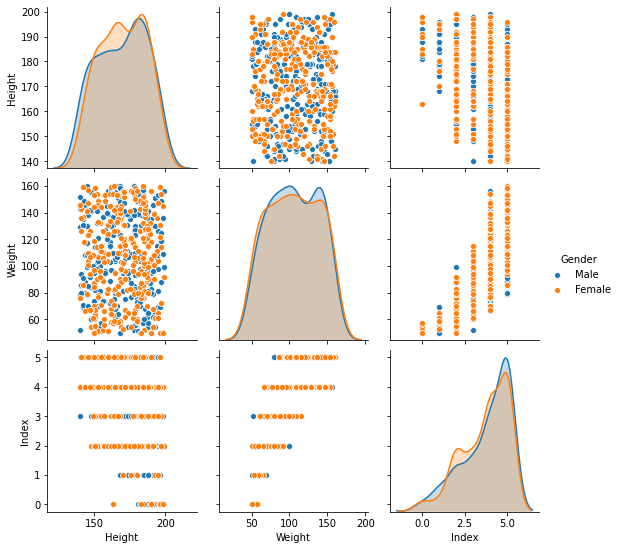

In [9]:
# Resume
sns.pairplot(bmi, hue='Gender')

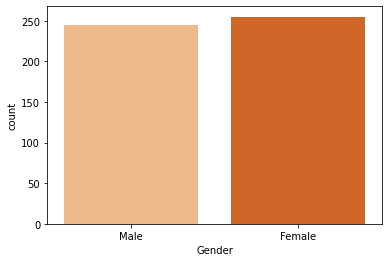

In [10]:
# Countplot of the Gender column
sns.countplot(x='Gender',data=bmi,palette='Oranges')

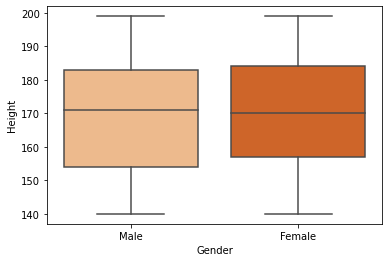

In [11]:
# Checking outliers in the data
sns.boxplot(x='Gender',y='Height',data=bmi,palette='Oranges')

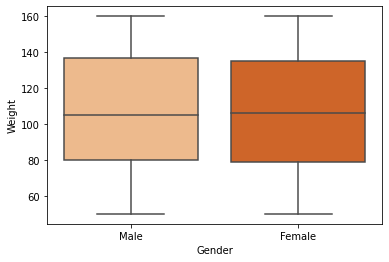

In [12]:
sns.boxplot(x='Gender', y='Weight',data=bmi,palette='Oranges')

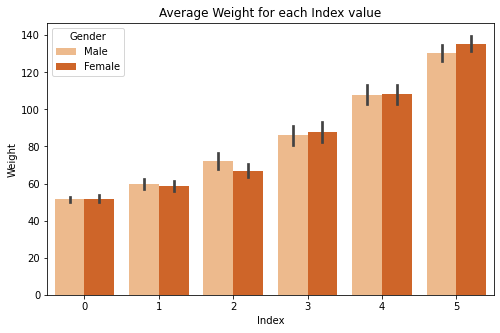

In [13]:
# From this graph, we can see a slight positive correlation
plt.figure(figsize=(8,5))
plt.title('Average Weight for each Index value')
sns.barplot(x='Index',y='Weight',hue='Gender',data=bmi,palette='Oranges')

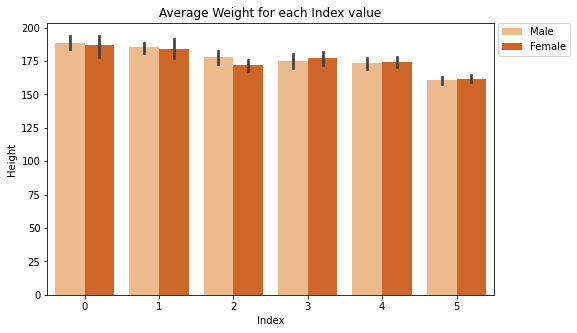

In [14]:
# Now from this graph we can see a slight negative correlation 
plt.figure(figsize=(8,5))
plt.title('Average Weight for each Index value')
sns.barplot(x='Index',y='Height',hue='Gender',data=bmi,palette='Oranges')
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0)

In [15]:
# Creating a new feature
bmi['BMI'] = round(bmi['Weight']/((bmi['Height']/100)**2),2)

In [16]:
# Checking the head again
bmi.head()

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48


Text(4, 19, 'BMI = 18')

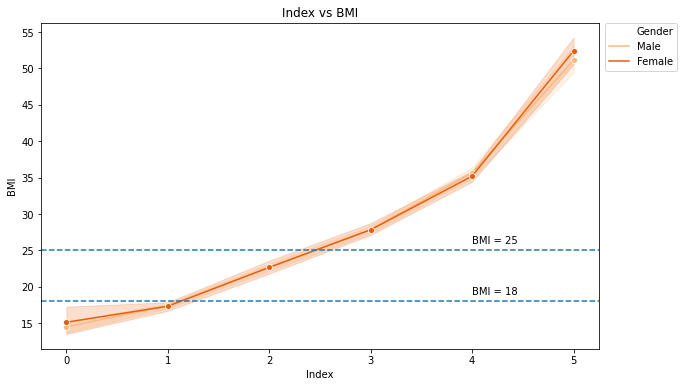

In [17]:
# Checking the BMI distribution by the Index
plt.figure(figsize=(10,6))
plt.title('Index vs BMI')
sns.lineplot(x='Index',y='BMI',hue='Gender',marker='o',data=bmi,palette='Oranges')
plt.legend(bbox_to_anchor=(1.01,1),loc=2,borderaxespad=0)
plt.axhline(18, ls='--')
plt.axhline(25, ls='--')
plt.text(4,26, "BMI = 25")
plt.text(4,19, "BMI = 18")

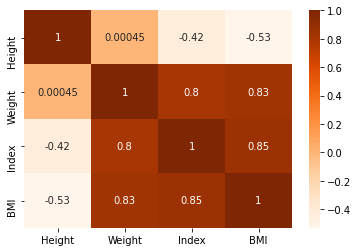

In [18]:
sns.heatmap(bmi.corr(),annot=True, cmap='Oranges')

## Let's go to modeling 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Encoding the column Gender
bmi['Gender'] = bmi['Gender'].map({'Male':0, 'Female':1})

In [21]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(bmi.drop('Index',axis=1), 
                                                    bmi['Index'], test_size=0.20, 
                                                    random_state=42)

In [22]:
# First let's choose some of the more common models for cross-validation:
# Logistic Regression
# SVC
# Decision Tree
# Random Forest

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
from sklearn import metrics

In [26]:
kfold = StratifiedKFold(n_splits=5)

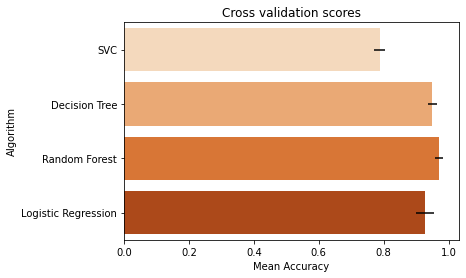

In [27]:
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValErrors':cv_std,'Algorithm':['SVC','Decision Tree', 'Random Forest', 'Logistic Regression']})

g = sns.barplot('CrossValMeans','Algorithm',data = cv_res, palette='Oranges',orient = 'h',**{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

# Training the models

In [28]:
# The list that will recieve the scores values
acscores = []

### Suport Vector Machine > SVC

In [29]:
svc = SVC()

In [30]:
svc.fit(X_train,y_train)

SVC()

In [31]:
pred_SVC = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred_SVC)
acscores.append(accuracy)

In [32]:
print(classification_report(y_test,pred_SVC))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           2       0.69      1.00      0.82        18
           3       0.55      0.75      0.63         8
           4       0.96      0.77      0.85        30
           5       0.97      0.97      0.97        39

    accuracy                           0.85       100
   macro avg       0.53      0.58      0.55       100
weighted avg       0.84      0.85      0.83       100



In [33]:
from sklearn.model_selection import GridSearchCV 

In [34]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [35]:
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)

In [36]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [38]:
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [39]:
grid_pred = grid.predict(X_test)
accuracy = metrics.accuracy_score(y_test, grid_pred)
acscores.append(accuracy)

In [40]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8
           4       0.93      0.93      0.93        30
           5       0.95      0.95      0.95        39

    accuracy                           0.96       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.96      0.96      0.96       100



### Decision Tree Classifier

In [41]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
pred_dtree = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, pred_dtree)
acscores.append(accuracy)

In [43]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8
           4       1.00      0.97      0.98        30
           5       0.97      1.00      0.99        39

    accuracy                           0.99       100
   macro avg       1.00      0.99      1.00       100
weighted avg       0.99      0.99      0.99       100



### Random Forest Classifier

In [44]:
rfc = RandomForestClassifier(n_estimators=500)

In [45]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [46]:
rfc_pred = rfc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, rfc_pred)
acscores.append(accuracy)

In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         8
           4       1.00      0.97      0.98        30
           5       0.97      1.00      0.99        39

    accuracy                           0.99       100
   macro avg       1.00      0.99      1.00       100
weighted avg       0.99      0.99      0.99       100



### Logistic Regression

In [48]:
logmodel = LogisticRegression()

In [49]:
from sklearn import preprocessing

In [50]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

scaler.mean_

scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[-1.        , -0.56559786, -0.52781773, -0.23494122],
       [-1.        ,  0.52179989,  0.64786069,  0.15424099],
       [-1.        ,  0.09892299,  1.01912756,  0.69322164],
       ...,
       [-1.        ,  0.46138891,  0.98818865,  0.44208896],
       [-1.        , -0.14272096,  1.60696677,  1.35409709],
       [-1.        , -0.56559786,  1.51415005,  1.634602  ]])

In [51]:
X_scaled.mean(axis=0)

array([ 0.00000000e+00, -6.83897383e-16, -6.21724894e-17,  2.28705943e-16])

In [52]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [53]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [54]:
logmodel_pred = logmodel.predict(X_test)
accuracy = metrics.accuracy_score(y_test, logmodel_pred)
acscores.append(accuracy)

In [55]:
print(classification_report(y_test,logmodel_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.75      0.75      0.75         4
           2       0.89      0.94      0.92        18
           3       0.70      0.88      0.78         8
           4       0.93      0.87      0.90        30
           5       0.97      0.95      0.96        39

    accuracy                           0.91       100
   macro avg       0.87      0.90      0.88       100
weighted avg       0.92      0.91      0.91       100



# Conclusion

In [56]:
acscores

[0.85, 0.96, 0.99, 0.99, 0.91]

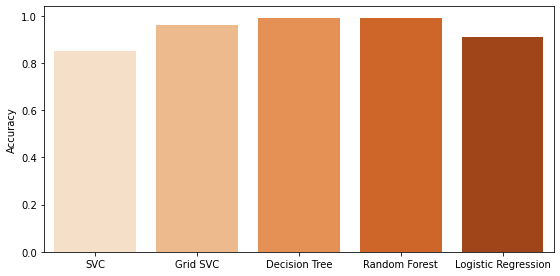

In [58]:
models_names = ['SVC','Grid SVC','Decision Tree', 'Random Forest', 'Logistic Regression']
plt.figure(figsize=(8,4))
plt.ylabel('Accuracy')
plt.tight_layout()
sns.barplot(x=models_names,y=acscores, palette='Oranges')

In [59]:
# The most efficient model was the Random Forest

### Saving the model

In [60]:
import joblib

In [61]:
filename = 'BMI_model.sav'

In [62]:
joblib.dump(logmodel, filename)

['BMI_model.sav']